# Libraries

In [1]:
import pandas as pd
from importlib import reload
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier as MLP
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings('ignore') 

# Dataset

In [2]:
dataset = pd.read_csv('../Dataset/heart.csv')
data = dataset.iloc[:, 0:-1]
label = dataset.iloc[:, -1]

dataset

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


# MLP Model

In [3]:
model = MLP(tol = 0, hidden_layer_sizes = (10), activation = 'logistic', learning_rate_init = 0.01)
model.fit(data, label)

MLPClassifier(activation='logistic', hidden_layer_sizes=10,
              learning_rate_init=0.01, tol=0)

# Score Evaluation

In [4]:
print('score:', model.score(data, label))
print('predictions:', model.predict(data))
print('expected:', label)

score: 0.8481848184818482
predictions: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 0 0 0 0 1 1 1 0 0 0 0 1 0 0 0 0 1 0 0
 1 0 0 1 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 1
 1 0 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 1 0 0 1 1 1 0 0 1 1 0 0 1 0 0 1 0 0
 1 0 0 1 0 0 1]
expected: 0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64


# Gradient Descent

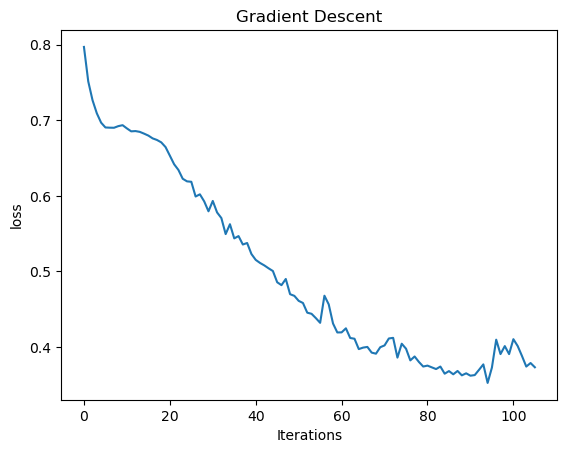

In [5]:
plt.plot(model.loss_curve_)
plt.xlabel('Iterations')
plt.ylabel('loss')
plt.title('Gradient Descent')

plt.show()

# Assignment
## 1. Lakukan percobaan dengan menggunakan ```Single Layer Perceptron``` dan ```Multi Layer Perceptron```
### a. Single Layer Perceptron

In [6]:
X_train, X_test, y_train, y_test = train_test_split(data, label, test_size=0.2, random_state=0)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

clf = Perceptron(penalty='l1', alpha=0.05, tol=1e-3, random_state=0)

clf.fit(X_train_scaled, y_train)

predictions = clf.predict(X_test_scaled)

print(' Classification Report of Test Data '.center(53, '-'))
print(f'\n{classification_report(y_test, predictions)}')

--------- Classification Report of Test Data --------

              precision    recall  f1-score   support

           0       0.76      0.81      0.79        27
           1       0.84      0.79      0.82        34

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.81      0.80      0.80        61



### b. Multi Layer Perceptron

In [7]:
mlp_clf = MLP(hidden_layer_sizes = (10,), activation = 'relu',
              learning_rate_init = 0.05, random_state = 120)

data_scaled = scaler.fit_transform(data)

mlp_clf.fit(data_scaled, label)

predictions = mlp_clf.predict(data_scaled)

print(' Classification Report of MLP Model '.center(53, '-'))
print(f'\n{classification_report(label, predictions)}')

--------- Classification Report of MLP Model --------

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       138
           1       1.00      1.00      1.00       165

    accuracy                           1.00       303
   macro avg       1.00      1.00      1.00       303
weighted avg       1.00      1.00      1.00       303



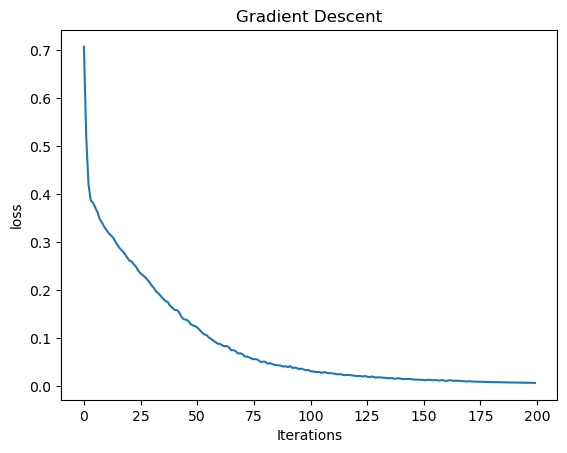

In [8]:
plt.plot(mlp_clf.loss_curve_)
plt.xlabel('Iterations')
plt.ylabel('loss')
plt.title('Gradient Descent')

plt.show()

## 2. Lakukan dengan menggunakan ```miu``` = 0.1, ```layer``` = 5, 10, 15, 20, 25

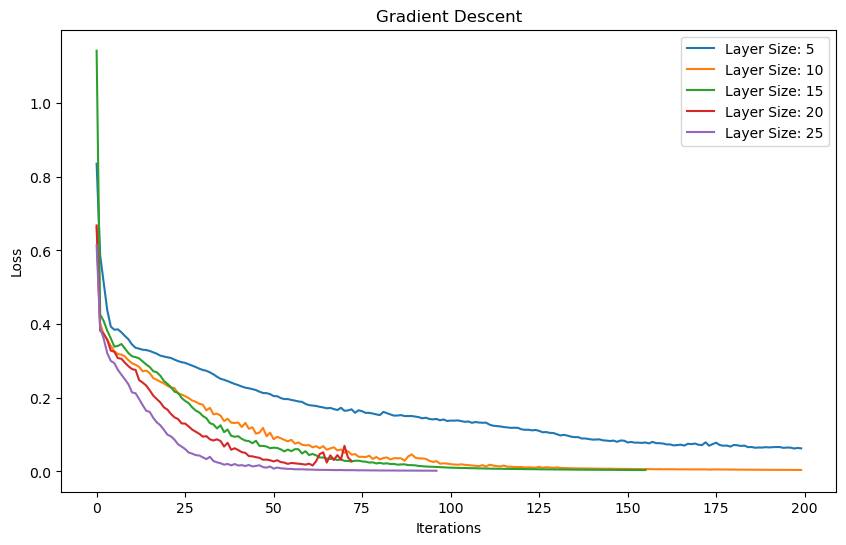

In [9]:
hidden_layers = [5, 10, 15, 20, 25]

plt.figure(figsize=(10, 6))

for layer_size in hidden_layers:
    model = MLP(hidden_layer_sizes=(layer_size,), activation='relu',
                learning_rate_init=0.1, random_state = 20)
    model.fit(data_scaled, label)
    
    pred = model.predict(data_scaled)
    
    plt.plot(model.loss_curve_, label=f'Layer Size: {layer_size}')

plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Gradient Descent')
plt.legend()
plt.show()

Let's see the details about accuracies and gradient descent for each layers.

------ Classification Report for Layer Size: 5 ------
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       138
           1       0.99      0.98      0.99       165

    accuracy                           0.99       303
   macro avg       0.99      0.99      0.99       303
weighted avg       0.99      0.99      0.99       303



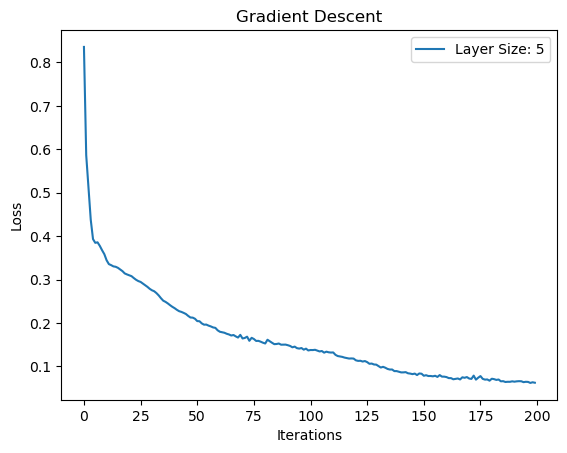

------ Classification Report for Layer Size: 10 -----
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       138
           1       1.00      1.00      1.00       165

    accuracy                           1.00       303
   macro avg       1.00      1.00      1.00       303
weighted avg       1.00      1.00      1.00       303



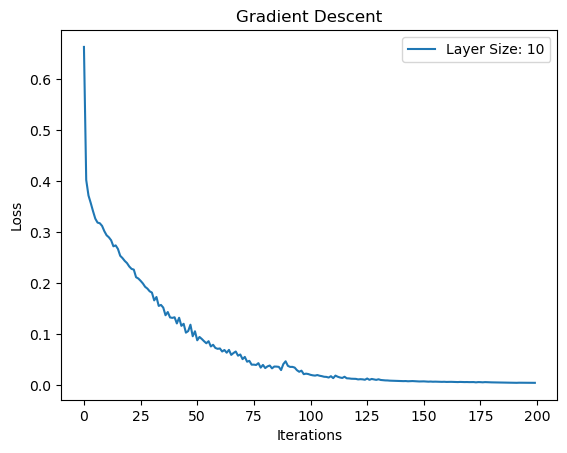

------ Classification Report for Layer Size: 15 -----
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       138
           1       1.00      1.00      1.00       165

    accuracy                           1.00       303
   macro avg       1.00      1.00      1.00       303
weighted avg       1.00      1.00      1.00       303



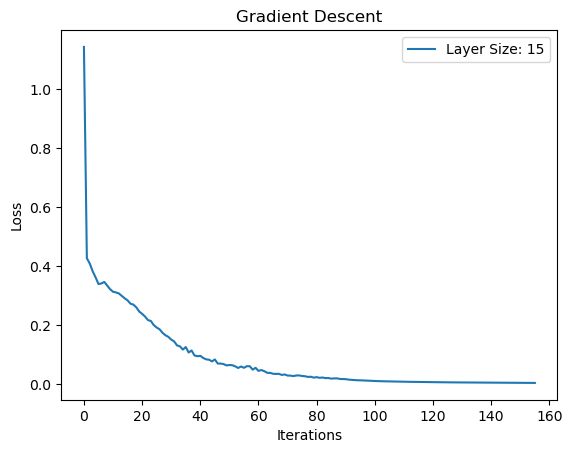

------ Classification Report for Layer Size: 20 -----
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       138
           1       1.00      0.96      0.98       165

    accuracy                           0.98       303
   macro avg       0.98      0.98      0.98       303
weighted avg       0.98      0.98      0.98       303



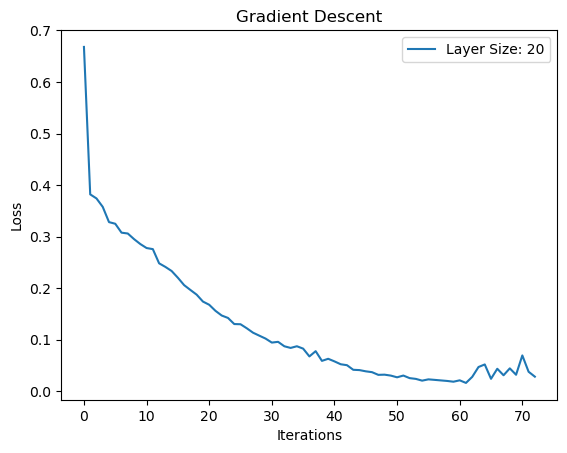

------ Classification Report for Layer Size: 25 -----
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       138
           1       1.00      1.00      1.00       165

    accuracy                           1.00       303
   macro avg       1.00      1.00      1.00       303
weighted avg       1.00      1.00      1.00       303



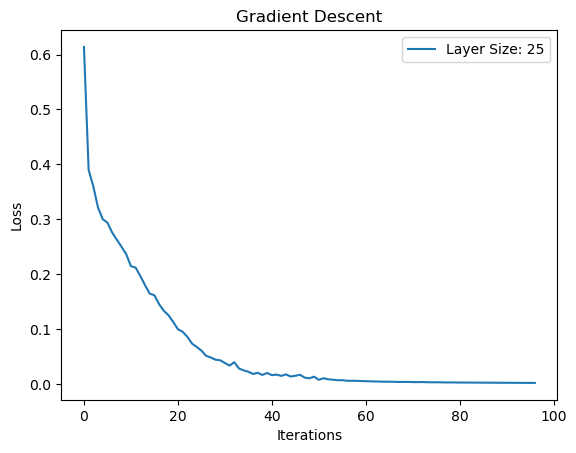

In [10]:
for layer_size in hidden_layers:
    model = MLP(hidden_layer_sizes=(layer_size,), activation='relu',
                learning_rate_init=0.1, random_state = 20)
    model.fit(data_scaled, label)
    
    pred = model.predict(data_scaled)
    
    print(f' Classification Report for Layer Size: {layer_size} '.center(53, '-'))
    print(classification_report(label, pred))
    
    plt.plot(model.loss_curve_, label=f'Layer Size: {layer_size}')

    plt.xlabel('Iterations')
    plt.ylabel('Loss')
    plt.title('Gradient Descent')
    plt.legend()
    plt.show()

## 3. Lakukan dengan menggunakan ```layer``` = 10 dengan ```miu``` = 0.01, 0.05, 0.1, 0.5, 1

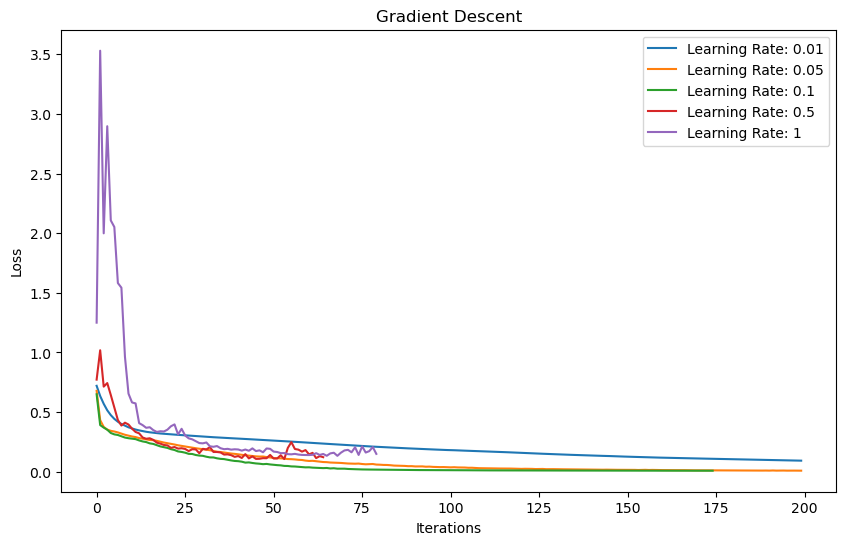

In [11]:
learning_rates = [0.01, 0.05, 0.1, 0.5, 1]

plt.figure(figsize=(10, 6))

for learning_rate in learning_rates:
    model = MLP(hidden_layer_sizes=(10,), activation='relu',
                learning_rate_init=learning_rate, random_state = 100)
    model.fit(data_scaled, label)
    
    pred = model.predict(data_scaled)
    
    plt.plot(model.loss_curve_, label=f'Learning Rate: {learning_rate}')

plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Gradient Descent')
plt.legend()
plt.show()

Let's see the details about accuracies and gradient descent for each layers.

--- Classification Report for Learning Rate: 0.01 ---
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       138
           1       0.98      0.99      0.98       165

    accuracy                           0.98       303
   macro avg       0.98      0.98      0.98       303
weighted avg       0.98      0.98      0.98       303



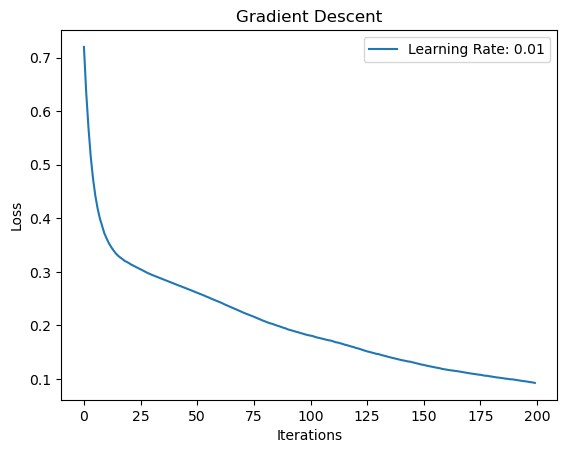

--- Classification Report for Learning Rate: 0.05 ---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       138
           1       1.00      1.00      1.00       165

    accuracy                           1.00       303
   macro avg       1.00      1.00      1.00       303
weighted avg       1.00      1.00      1.00       303



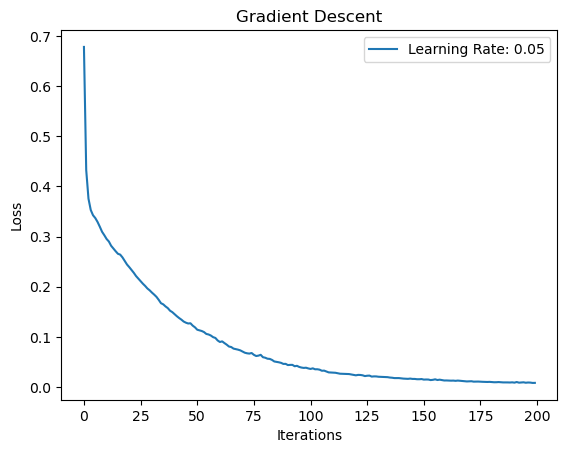

---- Classification Report for Learning Rate: 0.1 ---
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       138
           1       0.99      1.00      1.00       165

    accuracy                           1.00       303
   macro avg       1.00      1.00      1.00       303
weighted avg       1.00      1.00      1.00       303



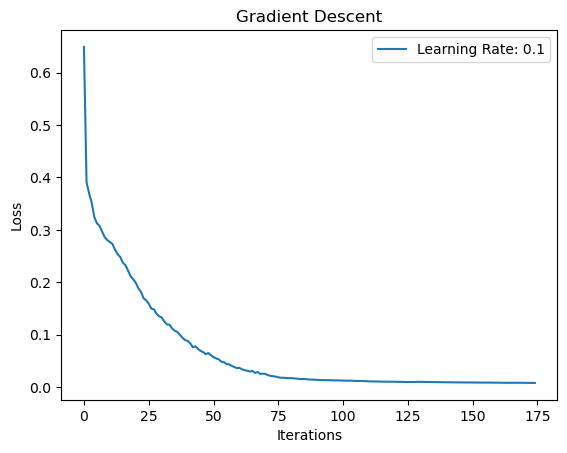

---- Classification Report for Learning Rate: 0.5 ---
              precision    recall  f1-score   support

           0       0.89      0.99      0.94       138
           1       0.99      0.90      0.94       165

    accuracy                           0.94       303
   macro avg       0.94      0.94      0.94       303
weighted avg       0.94      0.94      0.94       303



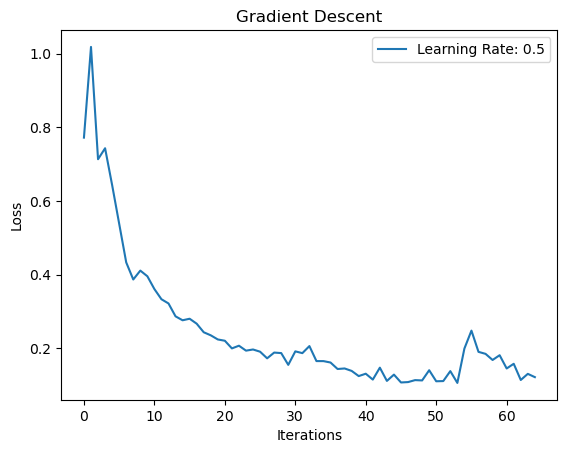

----- Classification Report for Learning Rate: 1 ----
              precision    recall  f1-score   support

           0       0.89      0.98      0.93       138
           1       0.98      0.90      0.94       165

    accuracy                           0.94       303
   macro avg       0.94      0.94      0.94       303
weighted avg       0.94      0.94      0.94       303



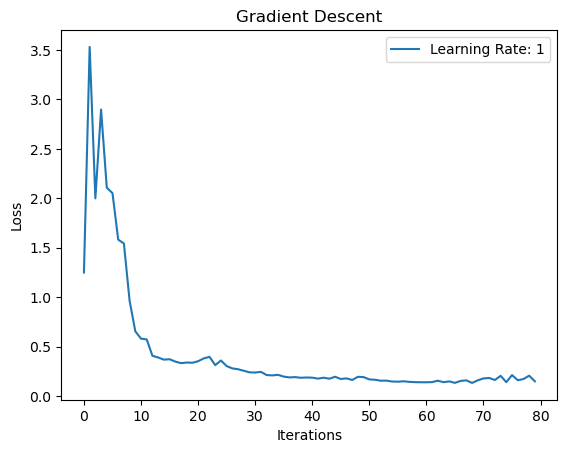

In [12]:
for learning_rate in learning_rates:
    model = MLP(hidden_layer_sizes=(10,), activation='relu',
                learning_rate_init=learning_rate, random_state = 100)
    model.fit(data_scaled, label)
    
    pred = model.predict(data_scaled)
    
    print(f' Classification Report for Learning Rate: {learning_rate} '.center(53, '-'))
    print(classification_report(label, pred))
    
    plt.plot(model.loss_curve_, label=f'Learning Rate: {learning_rate}')

    plt.xlabel('Iterations')
    plt.ylabel('Loss')
    plt.title('Gradient Descent')
    plt.legend()
    plt.show()